In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

from operator import itemgetter
import matplotlib.ticker as ticker
import math

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold



from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from typing import Dict, Tuple
from scipy import stats
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

%matplotlib inline 
sns.set(style="ticks")

## Выборка датасета и ее разделение на тестовую и обучающую

In [2]:
wine = load_wine()

In [3]:
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [4]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data']],
                     columns= wine['feature_names'])

In [5]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    wine.data, wine.target, test_size=0.35, random_state=1)

## Обучение моделей 

### Обучение линейной модели 

In [7]:
reg1 = LogisticRegression(max_iter=10000).fit(X_train, Y_train)


In [8]:
target1 = reg1.predict(X_test)

In [9]:
accuracy_score(Y_test, target1), precision_score(Y_test, target1, average='macro')

(0.9206349206349206, 0.9381499726327313)

In [10]:
Y_test


array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2])

In [11]:
target1

array([2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2])

In [12]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [13]:
print_accuracy_score_for_classes(Y_test, target1)

Метка 	 Accuracy
0 	 1.0
1 	 0.8333333333333334
2 	 0.9285714285714286


### Обучение SVM

In [16]:
model_svc = LinearSVC(C=1.0, max_iter=10000)
model_svc.fit(X_train, Y_train)
target2 = model_svc.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [17]:
accuracy_score(Y_test, target2), precision_score(Y_test, target2, average='macro')

(0.9523809523809523, 0.96)

In [18]:
Y_test

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2])

In [19]:
target2

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2])

In [20]:
print_accuracy_score_for_classes(Y_test, target2)

Метка 	 Accuracy
0 	 0.96
1 	 0.9583333333333334
2 	 0.9285714285714286


### Обучение деревья решений  

### Классификация 

In [21]:


def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    
        
        
    



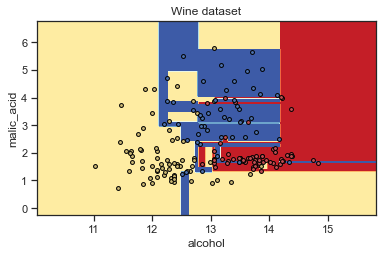

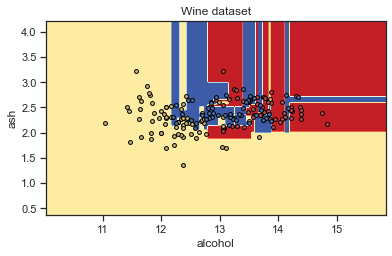

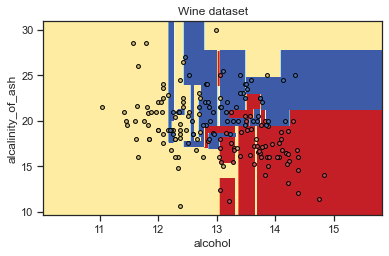

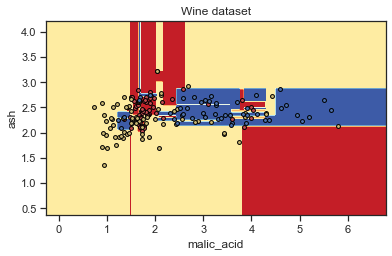

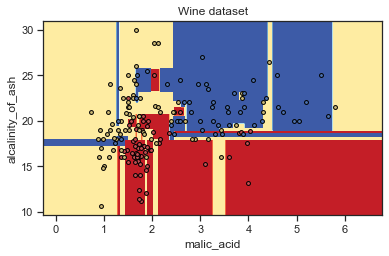

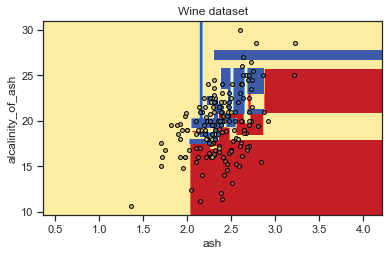

In [22]:
plot_tree_classification('Wine dataset', wine)



In [23]:
clf = DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
target3 = clf.predict(X_test)
accuracy_score(Y_test, target3), precision_score(Y_test, target3, average='macro')

(0.9206349206349206, 0.9221256038647342)

In [24]:
Y_test

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2])

In [25]:
target3

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2])

In [26]:
print_accuracy_score_for_classes(Y_test, target3)

Метка 	 Accuracy
0 	 0.92
1 	 0.875
2 	 1.0


### Итоги


In [27]:
print('Accuracy для "Логистической регресии"', accuracy_score(Y_test, target1))
print('Accuracy для "SVM"', accuracy_score(Y_test, target2))
print('Accuracy для "Дерева решений"', accuracy_score(Y_test, target3))

Accuracy для "Логистической регресии" 0.9365079365079365
Accuracy для "SVM" 0.9523809523809523
Accuracy для "Дерева решений" 0.9206349206349206
